In [1]:
import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()
import os
import sys
import csv
import talib
from   scipy.stats       import norm
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import mplfinance        as mpf

In [2]:
eurusd_df_ = pd.read_csv("./data/EURUSD.csv", parse_dates=True, index_col="datetime")

<Axes: >

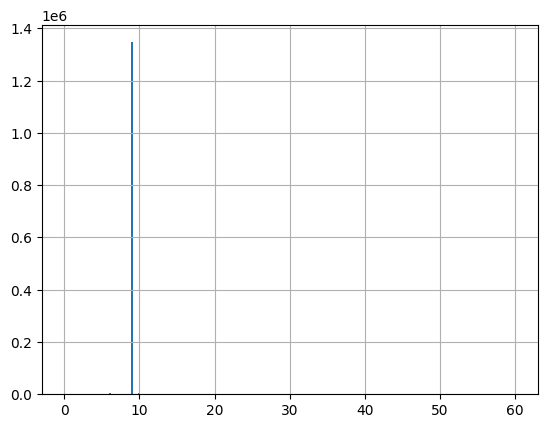

In [3]:
eurusd_df_["2020-01-01":]['Spread'].hist(bins=250, range=(0, 60))

In [4]:
# rolling averages of spreads
window = 4*60 # 4 hours rolling
eurusd_df_['average_spread'] = eurusd_df_['Spread'].rolling(window=window).mean()

In [5]:
timeframe_by_hours  = 4
timeframe_by_minute = timeframe_by_hours*60

In [6]:
timeframe = f"{timeframe_by_minute}Min"

eurusd_df = eurusd_df_.resample(timeframe).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume': 'sum', 'average_spread':'last'})
eurusd_df.rename(columns={"average_spread": "Spread"}, inplace=True)
eurusd_df.dropna(inplace=True) # Dropping because of FX doesn't trade during weekends

In [7]:
eurusd_df

,Open,High,Low,Close,Volume,Spread
datetime,,,,,,
2009-10-20 08:00:00+00:00,1.49855,1.49866,1.49540,1.49677,10690,13.933333
2009-10-20 12:00:00+00:00,1.49680,1.49900,1.49237,1.49425,13252,14.566667
2009-10-20 16:00:00+00:00,1.49426,1.49452,1.48823,1.49265,10517,13.920833
2009-10-20 20:00:00+00:00,1.49264,1.49451,1.49161,1.49358,4325,17.191667
2009-10-21 00:00:00+00:00,1.49356,1.49359,1.48879,1.49132,7009,16.629167
...,...,...,...,...,...,...
2023-10-13 12:00:00+00:00,1.05244,1.05471,1.04950,1.05002,20812,9.000000
2023-10-13 16:00:00+00:00,1.05004,1.05156,1.04992,1.05133,9189,9.000000
2023-10-13 20:00:00+00:00,1.05133,1.05136,1.05053,1.05065,949,9.000000


<Axes: >

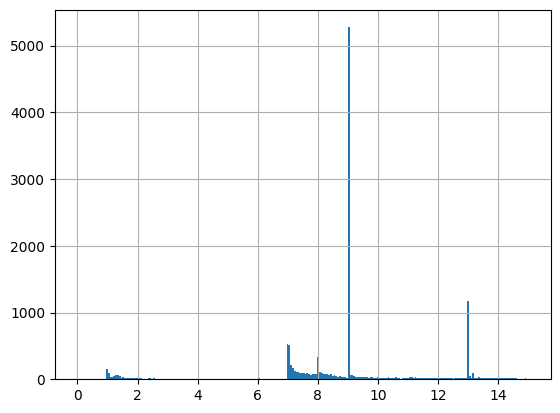

In [12]:
eurusd_df["2015-01-01":]['Spread'].hist(bins=250, range=(0, 15))

In [13]:
eurusd_df["2015-01-01":]['Spread'].mean()

9.669600682396483

In [14]:
eurusd_df["2015-01-01":]['Spread'].median()

9.0